# Calculate DNA volume via Monte Carlo simulation.

**Ali Akbar Riaz, Erik Jing Wei Feng, Abdul Rahman**

Deadline: **Nov 9, 2025**

<h1>Abstract</h1>

<h1>Introduction</h1>

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Task 0

In [3]:
#Unit is nm
x_min, x_max = 0, 100
y_min, y_max = 0, 100
z_min, z_max = 0, 100

## Task 1

In [ ]:
def random_point():    
    """
    Gives random point within simulation box
    
    Outputs
    -------
    Array of [x, y, z]
    """
    return (np.array([random.uniform(x_min, x_max), random.uniform(y_min, y_max), random.uniform(z_min, z_max),]))

43.65789911311197


## Task 2

In [ ]:
def define_sphere():
    """
    Defines a sphere with random point and random size. Can stick out.

    Outputs
    -------
    array of [x, y, z]
    radius
    """
    return (random_point(), random.uniform(0, 30))

## Task 3

In [ ]:
def is_inside_sphere(point, spherePosition, radius):
    """
    Checks if a point is inside given sphere.
    Inputs
    -------
    point : array of coordinates being checked [x, y, z]
    spherePosition : array of sphere center posititon [x_c, y_c, z_c]
    radius : radius of sphere 

    Outputs
    -------
    boolean 
    """
    if ((point[0]-spherePosition[0])**2 + (point[1]-spherePosition[1])**2 + (point[2]-spherePosition[2])**2) <= radius**2:
        return True
    else:
        return False

False


## Task 4 

0.029431149415582714


Text(0.5, 1.0, 'Fraction of points inside circle based on total random points')

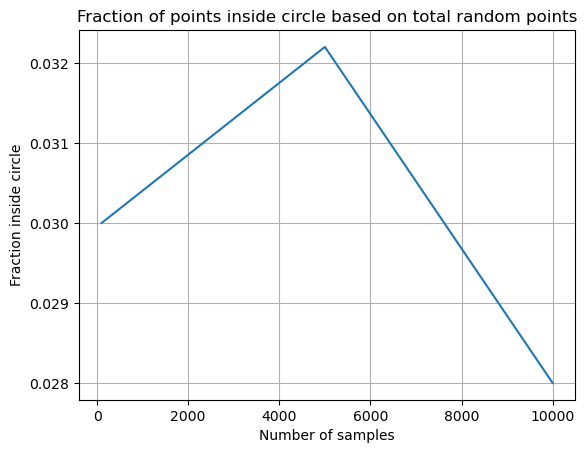

In [ ]:
def fraction_inside_sphere(numSample, spherePosition, radius):
    """
    Calculates the fraction of random points inside given sphere
    Inputs
    -------
    numSample : number of points
    spherePosition : array of sphere center posititon [x_c, y_c, z_c]
    radius : radius of sphere 

    Outputs
    -------
    fraction : fraction of points inside sphere
    """
    insideSphere = 0
    for _ in range(numSample):
        if is_inside_sphere(random_point(), spherePosition, radius) == True:
            insideSphere += 1
    return insideSphere/numSample

numSamples  = [100, 5000, 10000]
spherePosition, radius = define_sphere()
fractions = []

for n in numSamples:
    fractions.append(fraction_inside_sphere(n, spherePosition, radius))

#To check if the result is right we use the exact theoretical fraction
analyticalResult = (((4/3)*math.pi*radius**3) / (x_max * y_max * z_max))
print(analyticalResult)

plt.plot(numSamples, fractions)
plt.grid()
plt.xlabel("Number of samples")
plt.ylabel("Fraction inside spheres")
plt.title("Fraction of points inside spheres based on total random points")

Since we dont constrain the sphere to be completly inside the simulation box its possible for it to extend beyond it, if its center is in a corner for example. The analytical formula dosent take this into account. Therefore discrepancies between the Monte Carlo estimate and the analytical are expected.

## Task 5

From the analytical formula we can derive that if we constrain the sphere inside the simulation box by setting the sphere center at the center we get:


$f = \frac{\text{Number of points inside sphere}}{\text{Total number of points}}$

$f \approx \frac{\text{Volume of sphere}}{\text{Volume of simulation box}} 
= \frac{\frac{4}{3} \pi r^3}{X_{\text{max}} Y_{\text{max}} Z_{\text{max}}}$

$\pi \approx \frac{3 \, f \, X_{\text{max}} Y_{\text{max}} Z_{\text{max}}}{4 r^3}$


In [ ]:
def calculate_pi(numSample, spherePosition, radius):
    """
    Calculates estimate for pi based on fraction of random points inside given sphere
    Inputs
    -------
    numSample : number of points
    spherePosition : array of sphere center posititon [x_c, y_c, z_c]
    radius : radius of sphere 

    Outputs
    -------
    pi : estimate for pi
    """
    insideSphere = 0
    for _ in range(numSample):
        if is_inside_sphere(random_point(), spherePosition, radius) == True:
            insideSphere += 1
    return((3*(insideSphere/numSample)*x_max*y_max*z_max) / (4*(radius**3)))

print("Estimated pi value is:", calculate_pi(10000, [x_max/2, y_max/2, z_max/2], x_max/2))


Estimated pi value is: 3.164399999999999


## Task 6

In [ ]:
spheres = []
for _ in range(10):
    spheres.append(define_sphere())

## Task 7

Analytical fraction inside spheres: 0.21972153739452616


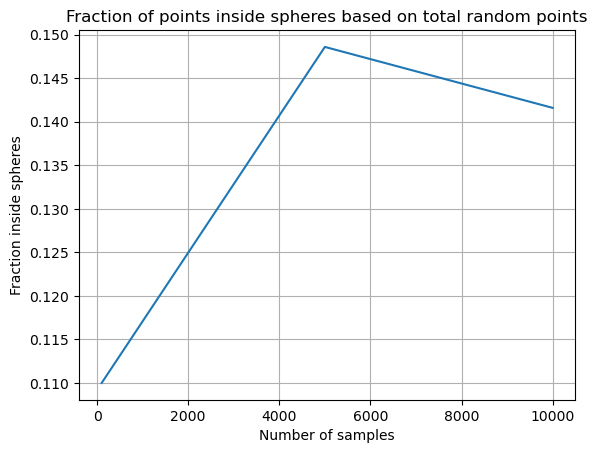

In [ ]:
def fraction_inside_spheres(numSample, spheres):
    """
    Calculates the fraction of points inside given multiple spheres
    Inputs
    -------
    numSample : number of points
    spheres : list with sphere objects that contain spherePosition and radius

    Outputs
    -------
    fraction : fraction of points inside sphere
    """
    inside_sphere = 0
    for _ in range(numSample):
        point = random_point()
        for sphere in spheres:
            if is_inside_sphere(point, sphere[0], sphere[1]) == True:
                inside_sphere += 1
                break
    return inside_sphere/numSample

numSamples  = [100, 5000, 10000]
fractions = []

for n in numSamples:
    fractions.append(fraction_inside_spheres(n, spheres))

#to check if its correct we compare with the analytical solution
def analytical_fraction_inside_spheres(spheres):
    """
    Calculates the fraction of points inside given sphere analytically
    Inputs
    -------
    spheres : list with sphere objects that contain spherePosition and radius

    Outputs
    -------
    analyticalResult : volume of spheres / volum of box
    """
    analyticalResult = 0
    for sphere in spheres:
        analyticalResult += (((4/3)*math.pi*sphere[1]**3) / (x_max * y_max * z_max))
    return analyticalResult

plt.plot(numSamples, fractions)
plt.plot()
plt.grid()
plt.xlabel("Number of samples")
plt.ylabel("Fraction inside spheres")
plt.title("Fraction of points inside spheres based on total random points")

print("Analytical fraction inside spheres:", analytical_fraction_inside_spheres(spheres))


Its difficult to know if the result is right because the analytical sum overestimates the true fraction. This is because it dosent account for spheres overlapping and calculates the sum volume. Monte Carlo doesent do this because of the break statement in the loop, which means it at most only registers one sphere per point. This explains the discrepency between the results.

## Task 8


In [ ]:
atomic_radius = {
    "H": 120,
    "C": 170,
    "N": 155,
    "O": 152,
    "P": 180
}

atoms = []

with open("dna_coords.txt", "r") as f:
    """
    Reads the file with atomic coordinates and stores them in a list along with their atomic radius
    """
    for line in f:
        parts = line.split()
        if len(parts) == 4:
            element = parts[0]
            x = float(parts[1])
            y = float(parts[2])
            z = float(parts[3])
            radius = atomic_radius.get(element, None)  
            r = radius / 100 # Convert pm to angstrom
            atoms.append((element, x, y, z, r))

for entry in atoms:
    """
    Prints each atom entry with its coordinates and radius
    """
    print(entry)

('H', -48.18074, 1.74518, -1.22092, 1.2)
('O', -48.07374, 1.26418, -0.40592, 1.52)
('P', -46.63374, 1.27818, -0.00492, 1.8)
('O', -46.41374, 2.54218, 0.72908, 1.52)
('O', -45.84374, 1.10018, -1.24492, 1.52)
('O', -46.38374, 0.03718, 0.96608, 1.52)
('C', -47.32374, -0.20882, 2.04108, 1.7)
('C', -46.59374, -0.77082, 3.24208, 1.7)
('O', -46.38374, -2.20382, 3.03108, 1.52)
('C', -45.19374, -0.21982, 3.50308, 1.7)
('O', -44.80374, -0.36082, 4.86308, 1.52)
('C', -44.31374, -1.10482, 2.63208, 1.7)
('C', -45.02374, -2.44782, 2.72708, 1.7)
('N', -44.97374, -3.24482, 1.47308, 1.55)
('C', -44.82374, -4.62382, 1.58008, 1.7)
('O', -44.73374, -5.13082, 2.70808, 1.52)
('N', -44.77374, -5.33482, 0.24908, 1.55)
('C', -44.87374, -4.78882, -0.75492, 1.7)
('N', -44.82374, -5.56182, -1.83092, 1.55)
('C', -45.02374, -3.37382, -0.89492, 1.7)
('C', -45.07374, -2.64882, 0.25408, 1.7)
('H', -47.81374, 0.73518, 2.32008, 1.2)
('H', -48.08274, -0.93082, 1.70608, 1.2)
('H', -47.21574, -0.59582, 4.12708, 1.2)
('H', 

## Task 9

In [37]:
# Initialize min and max
min_x = min_y = min_z = math.inf
max_x = max_y = max_z = -math.inf

for element, x, y, z, r in atoms:
    """
    Determines the minimum and maximum coordinates to define the simulation box
    """
    min_x = min(min_x, x - r)
    max_x = max(max_x, x + r)
    min_y = min(min_y, y - r)
    max_y = max(max_y, y + r)
    min_z = min(min_z, z - r)
    max_z = max(max_z, z + r)

box_length_x = max_x - min_x
box_length_y = max_y - min_y
box_length_z = max_z - min_z

print(f"Simulation box dimensions:")
print(f"X: {box_length_x} Å")
print(f"Y: {box_length_y} Å")
print(f"Z: {box_length_z} Å")

Simulation box dimensions:
X: 20.221000000000004 Å
Y: 23.353 Å
Z: 22.929000000000002 Å


## Task 10